# Advanced ML: Домашнее задание 4

1. Реализуйте базовый частотный метод по Шерлоку Холмсу:

    подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);

    возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе совсем вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

    расшифруйте их таким частотным методом.


In [1]:
import string
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk import everygrams
import umap
import numpy as np
from sklearn.manifold import TSNE

In [2]:
np.random.seed(42)

In [3]:
class TextProcessor():

    def __init__(self, language, ngram_range):
        self.token_list = (string.ascii_lowercase + ' ') if language == 'en' else 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
        self.ngram_range = ngram_range
        self.code = ''.join(random.sample(self.token_list, len(self.token_list)))
        self.mapping = str.maketrans(self.token_list, self.code)

    def train(self, text):
        text_lower = ''.join([char for char in text.lower() if char in self.token_list])
        tokized_text = []
        for i in range(len(text_lower) - self.ngram_range + 1):
            tokized_text.append(text_lower[i:i + self.ngram_range])
        frequencies = Counter(tokized_text)
        rating = np.argsort(list(frequencies.values()))[::-1]
        self.frequencies = frequencies
        self.sorted_frequencies = np.array(list(frequencies.keys()))[rating]

    def apply_freq(self, text):
        text_len = len(text)
        text += ' ' * (text_len % self.ngram_range)
        tokized_text = []
        for i in range(0, len(text) - self.ngram_range + 1, self.ngram_range):
            tokized_text.append(text[i:i + self.ngram_range])
        frequencies = Counter(tokized_text)
        rating = np.argsort(list(frequencies.values()))[::-1]
        sorted_tokens = np.array(list(frequencies.keys()))[rating]
        mapping_size = min(len(sorted_tokens), len(self.sorted_frequencies))
        mapping = {}
        for i in range(mapping_size):
            mapping[sorted_tokens[i]] = self.sorted_frequencies[i]
        return ''.join([mapping[n_gram] for n_gram in tokized_text])[:text_len]

    def apply_enc(self, text, mapping):
        if mapping is None:
            mapping = self.mapping
        encoded = text.lower().translate(mapping)
        return ''.join([char for char in encoded if char in self.code])
    
    def de_enc_accuracy(self,origin,adaptation):
        origin_tokenized = [char for char in origin.lower() if char in self.token_list]
        adaptation_tokenized = list(adaptation)
        eqs = (np.array (origin_tokenized) == np.array(adaptation_tokenized)).sum()
        return eqs / len(origin)

In [4]:
with open('data/WarAndPeace.txt', 'r',encoding='utf-8') as f:
    train_text_1 = f.read()
with open('data/AnnaKarenina.txt', 'r',encoding='utf-8') as f:
    train_text_2 = f.read()

train_text = train_text_1 + train_text_2

In [5]:
#test_text = 'Бутлер смотрел на эти горы, дышал во все легкие и радовался тому, что он живет, и живет именно он, и на этом прекрасном свете. Радовался он немножко и тому, что он так хорошо вчера вел себя в деле и при наступлении и в особенности при отступлении, когда дело было довольно жаркое, радовался и воспоминанию о том, как вчера, по возвращении их из похода, Маша, или Марья Дмитриевна, сожительница Петрова, угощала их и была особенно проста и мила со всеми, но в особенности, как ему казалось, была к нему ласкова. Марья Дмитриевна, с ее толстой косой, широкими плечами, высокой грудью и сияющей улыбкой покрытого веснушками доброго лица, невольно влекла Бутлера, как сильного, молодого холостого человека, и ему казалось даже, что она желает его. Но он считал, что это было бы дурно по отношению доброго, простодушного товарища, и держался с Марьей Дмитриевной самого простого, почтительного обращения, и радовался на себя за это. Сейчас он думал об этом.'

In [6]:
with open('data/test.txt', 'r',encoding='utf-8') as f:
    test_text = f.read()

In [7]:
processor_one = TextProcessor(language='ru', ngram_range=1)

In [8]:
processor_one.train(train_text)

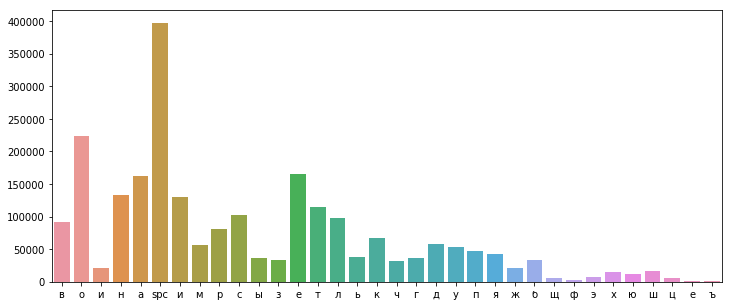

In [122]:
plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()), list(processor_one.frequencies.values()))
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.show()

In [10]:
encoded = processor_one.apply_enc(test_text,mapping = None)

In [11]:
decoded = processor_one.apply_freq(encoded)

In [12]:
decoded

'он ешаи тз уолмрп ыде яоивжти мазеннпе деньыт р м еыо задекхаи луосктсеиь яод якедиоыоу нетуентг иойадеч но р лвюнолст яо выорокв мосокпч он лдеиаи дарно л лодекхасеиеу ыолстнтцп задекхтрась на день рлеш якоезхаэютш виан уоиоденьмтч релеипч уаиьжтм соиьмо жсо яоивжтрйтч р уолмре ос кодтсеиеч скт сплгжт на обзареденте р яоимв бпи кад якобпсь ро ркеуг рпбокор нелмоиьмо днеч р ыокоде м т надегилг свс на лиарв яорелеитсьлг одтн яоуеютм леуечнпч бпи еув знамоу т он лбткаилг яоешась м неув яороиожтсьлг за еыо дожекьут моыда мараиектлс гртилг знамоутсьлг м вианв т р сос хе режек без рлгмоч двкноч уплит лреи еыо л лротут знамоупут ившнорпу т дквытут тыкомаут р обюеч заие л соыо хе режека виан леи за тыкв т не соиьмо не ездти м знамоуоув яоуеютмв но не лякайтраи боиьйе яко иойадеч т не рпшодти жеспке днг тз моунасподерйтль т наятрйтль жаэ он яодойеи м омнв еув зашосеиоль якочстль жсобп якоынась неосргзжтрпе тыокнпе роляоутнантг он надеи йтнеиь т рпйеи на витцв лоинце вхе лякгсаиоль за беипе до

In [13]:
processor_one.de_enc_accuracy(test_text,decoded)
        

0.4992987377279102

In [133]:
temp_proc= TextProcessor(language='ru', ngram_range=1)

In [135]:
temp_proc.train(test_text)

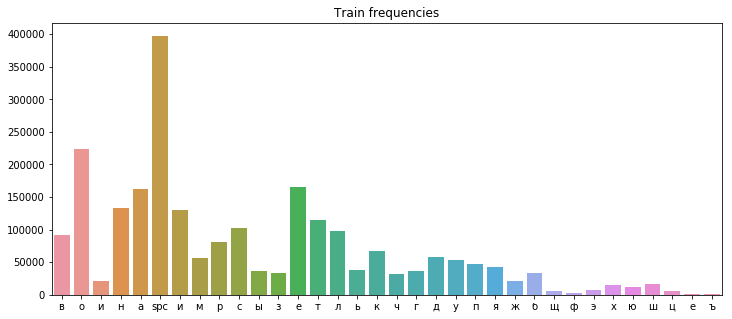

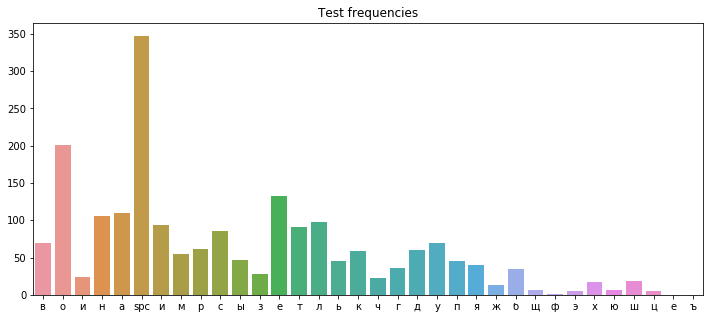

In [145]:
plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()), list(processor_one.frequencies.values()))
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.title('Train frequencies')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(list(processor_one.frequencies.keys()),[temp_proc.frequencies[x] for x in list(processor_one.frequencies.keys()) ])
plt.xticks(range(len(list(processor_one.frequencies.keys()))),[ x if x !=' ' else 'spc' for x in list(processor_one.frequencies.keys())])
plt.title('Test frequencies')
plt.show()

Вообще, хотя метрики и плоховаты, распределение символов похоже, но, естественно, есть отклонения, текст, все же, короткий. И еще, было важно, как мне кажется, соблюдать рамки одгого "языка" в том смысле, что если мы возьмем тексты разных авторов, да еще и разной эпохи, картина такого "языка" в виде подобного распределения будет отличаться, и метрики окажутся еще печальнее.

Таким образом можно детектить разных авторов, возможно, какие-то сообщества товарищей по когнитивным нарушениям и т.д. по распределениям символов в их текстах/сообщениях/комментариях. 
Короче говоря, отсылка к [смайлик анализу](https://en.wikipedia.org/wiki/Not_Funny). (Может упомяналось на лекции и я упустил. Не Шерлок Холмс, конечно...)

2. Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

    подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
    
    проведите тестирование аналогично п.1, но при помощи биграмм.


In [146]:
processor_bi = TextProcessor(language='ru', ngram_range=2)

In [147]:
processor_bi.train(train_text)

In [148]:
encoded_bi = processor_bi.apply_enc(test_text)

In [150]:
decoded_bi = processor_bi.apply_freq(encoded_bi)

In [151]:
processor_bi.de_enc_accuracy(test_text,decoded_bi)

0.11266947171575503

Печально, но не удивительно, тестовый текст слишком короткий (а длинный брать, скорее, не совсем честно). Вряд ли тут можно обойтись без какой-то базовой инициализации (скорее именно так стоит проинтерпретировать шаг Холмса).

3. Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:

    предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
    
    
    реализуйте и протестируйте его, убедитесь, что результаты улучшились.


Текст, по сути, представляет из себя Марковскую цепь, точнее, его модель. Вообще говоря, может это упомяналось в курсе, и я успешно прослушал, но, вроде, ориджин МЦ берет начало как раз в лингвистике и анализе текстов (тут без ссылки на литературу, увы). Будем обучать матрицу переходов между n-граммами, вероятности переходов будут соответствовать частотам. Перемножая вероятности переходов в перестановках, можно найти правдоподобие каждой перестановки. 

In [133]:
class MCMCProcessor(TextProcessor):

    def train(self, text):
        text_lower = ''.join([char for char in text.lower() if char in self.token_list])
        tokized_text = []
        vocab_len = len(set(text)) ** self.ngram_range
        for i in range(len(text_lower) - self.ngram_range + 1):
            tokized_text.append(text_lower[i:i + self.ngram_range])
        frequencies = Counter(tokized_text)
        rating = np.argsort(list(frequencies.values()))[::-1]
        self.frequencies = frequencies
        for key, value in self.frequencies.items():
            frequencies[key] = (value + 1) / (len(text) + vocab_len)
        self.sorted_frequencies = np.array(list(frequencies.keys()))[rating]

    def calculate_transition_probas(self, text):
        self.char_idxs = {char: idx for idx, char in enumerate(self.token_list)}
        self.transition_probas = np.zeros((len(self.token_list), len(self.token_list)))
        text = ''.join([char for char in text.lower() if char in self.token_list])
        for i in range(len(text) - self.ngram_range):
            self.transition_probas[
                self.char_idxs[text[i:i + self.ngram_range]], self.char_idxs[text[i + 1:i + self.ngram_range + 1]]] += 1
        self.transition_probas = np.clip(self.transition_probas, 1, None)
        self.transition_probas = (np.log(self.transition_probas).T
                                  - np.log(self.transition_probas.sum(axis=1))).T

    def apply_transition(self, text, permutation):
        transtable = str.maketrans(self.token_list, ''.join(permutation))
        return text.translate(transtable)

    def get_text_proba(self, text, permutation):
        text = self.apply_transition(text, permutation)
        log_likelihood = 0
        for i in range(len(text) - self.ngram_range):
            log_likelihood += self.transition_probas[self.char_idxs[text[i]], self.char_idxs[text[i + 1]]]
        return log_likelihood

    def apply_mcmc(self, text, zero_mapping=None, n_iters=1000, n_try=3,verbose = False):
        res = []
        if zero_mapping is None:
            permutation = np.array(list(self.token_list))
        else:
            permutation = zero_mapping
        for n in range(n_try):
            for _ in range(n):
                np.random.shuffle(permutation)
            cur_log_likelihood = -np.inf
            best_log_likelihood = -np.inf
            best_permutation = permutation.copy()
            logs = []
            perms = []
            for i in range(n_iters):
                idx = np.random.choice(range(len(self.token_list)), size=2)
                permutation[idx[0]], permutation[idx[1]] = \
                    permutation[idx[1]], permutation[idx[0]]
                new_log_likelihood = self.get_text_proba(text, permutation)
                logs.append(new_log_likelihood)
                perms.append(permutation)
                if cur_log_likelihood <= new_log_likelihood:
                    cur_log_likelihood = new_log_likelihood
                    if new_log_likelihood > best_log_likelihood:
                        best_log_likelihood = new_log_likelihood
                        best_permutation = permutation.copy()
                else:
                    if np.exp(new_log_likelihood - cur_log_likelihood) > random.random():
                        cur_log_likelihood = new_log_likelihood
                    else:
                        permutation[idx[0]], permutation[idx[1]] = \
                            permutation[idx[1]], permutation[idx[0]]
            if verbose:
                print(
                    f'Experiment number {n + 1}, Likelihood = {best_log_likelihood}, '
                    f'metrics = {self.de_enc_accuracy(test_text, self.apply_transition(text, best_permutation))}')
            res.append({'text': self.apply_transition(text, best_permutation), 'perms': perms, 'logs': logs})
        return res

In [108]:
test_mcmc = MCMCProcessor(language='ru', ngram_range=1)

In [109]:
test_mcmc.calculate_transition_probas(train_text)

In [89]:
res = test_mcmc.apply_mcmc(encoded,n_iters=3000,n_try=4,zero_mapping=None,verbose = True)

Experiment number 1, Likelihood = -5127.764456644028, metrics = 0.9093034128097242
Experiment number 2, Likelihood = -7164.11949728618, metrics = 0.006077606358111267
Experiment number 3, Likelihood = -5084.179746206266, metrics = 0.9378214118747078
Experiment number 4, Likelihood = -5413.15362841742, metrics = 0.7704534829359514


In [92]:
res[2]['text']

'он ецал из москвы где получил казенные деньги в к его задержал смотритель под предлогом неимения лошадей но в сущности по уговору который он сделал давно с содержателем гостинихы задерживать на день всец проезжающиц улан молоденький веселый мальчик только что получивший в москве от родителей три тысячи на обзаведение в полку был рад пробыть во время выборов несколько дней в городе к и надеялся тут на славу повеселиться один помещик семейный был ему знаком и он сбирался поецать к нему поволочиться за его дочерьми когда кавалерист явился знакомиться к улану и в тот же вечер без всякой дурной мысли свел его с своими знакомыми луцновым и другими игроками в общей зале с того же вечера улан сел за игру и не только не ездил к знакомому помещику но не спрашивал больше про лошадей и не выцодил четыре дня из комнатыодевшись и напившись чаю он подошел к окну ему зацотелось пройтись чтобы прогнать неотвязчивые игорные воспоминания он надел шинель и вышел на улиху солнхе уже спряталось за белые до

Метрики, конечно, получше получились. Интереса ради хотел бы посмотреть, можно ли попробовать нарисовать траекторию, понижая размерность пространства.(лучше это не смотреть)

In [93]:
cords = [list(map(ord,i)) for i in res[2]['perms']]

In [95]:
X_embedded = TSNE(n_components=2,perplexity=10).fit_transform(cords[:100])
X_embedded.shape

(100, 2)

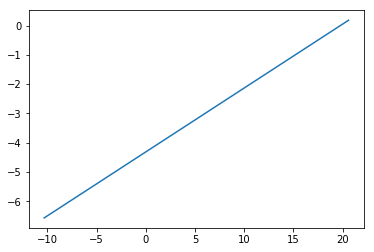

In [96]:
plt.plot(X_embedded[0],X_embedded[1])

In [98]:
embedding2 = umap.UMAP(n_neighbors=5,metric='cosine').fit_transform(cords[:400])

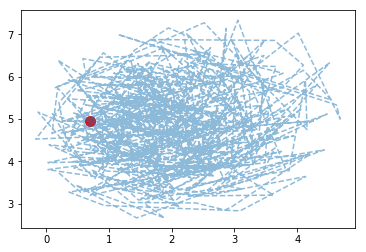

In [99]:
plt.plot(embedding2[:,0],embedding2[:,1],linestyle='dashed',alpha=0.5)
plt.scatter(embedding2[:,0][-1],embedding2[:,1][-1],c='red',s=100)

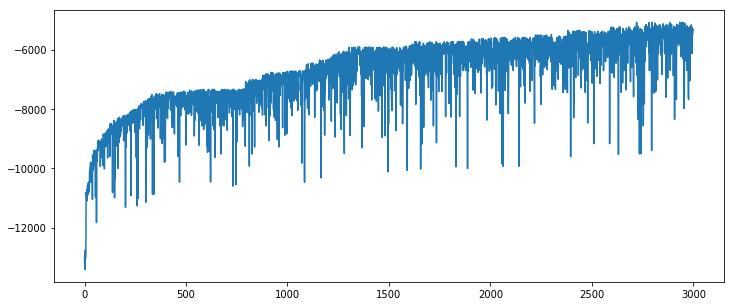

In [100]:
plt.figure(figsize=(12,5))
plt.plot(res[2]['logs'])

Ну, не сказать, что тут есть что-то красивое при использовании umap. Ну да, есть некоторая "средняя" перестановка, вокруг которой все происходит. Но как-то не очевидно, ибо сам метод влияет на визуализированное представление происходяшего.

4. Расшифруйте сообщение.

In [128]:
msg='დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ'

In [235]:
alphabet = list('абвгдеёжзийклмнопрстуфхцчшщъыьэюя ')

In [236]:
np.random.shuffle(alphabet)

In [237]:
msg_letters = ''.join(set(msg))
msg = msg.translate(str.maketrans(msg_letters, ''.join(alphabet)[:len(msg_letters)]))

In [238]:
msg

'чеюмкхькхмтмцчкпыъбуюшпьжкмюмкёыэцмкпыъбуюшпьжкцчяецкфкрцысыкеыызнчпмгкяыцыъьжкючсяыкёъыэмцуцшкеяыъччкхечсыкхькхечкетчюуюмкёъухмюшпыкмкёыюфэмцчкбуяембуюшпьжкзуююкйукёыеючтпччкэчцхчъцычкйутупмчкяфъеуклыцгкяыпчэпыкгкпмэчсыкпчкызчну '

In [239]:
fin_res = test_mcmc.apply_mcmc(msg,n_iters=800000,n_try=10,zero_mapping=None)

In [250]:
fin_res[0]['text']

'если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаж'

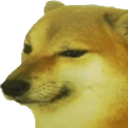

Опять же, уже поздно заметил, что задание было про биграммы, но, все же, +- результат удачный.

6. Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

1. В случае, если какая-то информация/текст была закодирована в неизвестной кодировке(может, какая-то нестандартная кодировка, базовые, конечно, можно и перебрать быстро). 
2. Не совсем уверен в том, как могут искажаться различные сигналы, но если природа их искажения, да и не обязательно сигналов, опять же, возможно, каких-то файлов, имеет тендецию одинаково искажать одни и те же фрагменты. Вряд ли такая ситуация на практике имеет такой функциональный характер, но вдруг.
3. Такая модель будет хорошо работать в случае равномерного кодирования, иначе перебор усложняется. Если говорить в таком контексте, честно говоря, не думаю, что сегодня где-то имеются подобные задачи в чистом виде (кроме, собственно, UTF всяких и т.д.).
4. Занимаясь задачей классификации возрастных групп трупов, общался с судмедэкспертами, которые что-то говорили о расшифровке генома, ДНК, вот это все, может там есть применение таким подходам. Но ибо проекты на эту тему каких-то глобальных масштабов, наверное, такое там уже применили бы, если имеет смысл. Как можно заметить, на этом мои познания в этой предметной области заканчиваются. 